In [98]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as sklt
sns.set()

In [99]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [101]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

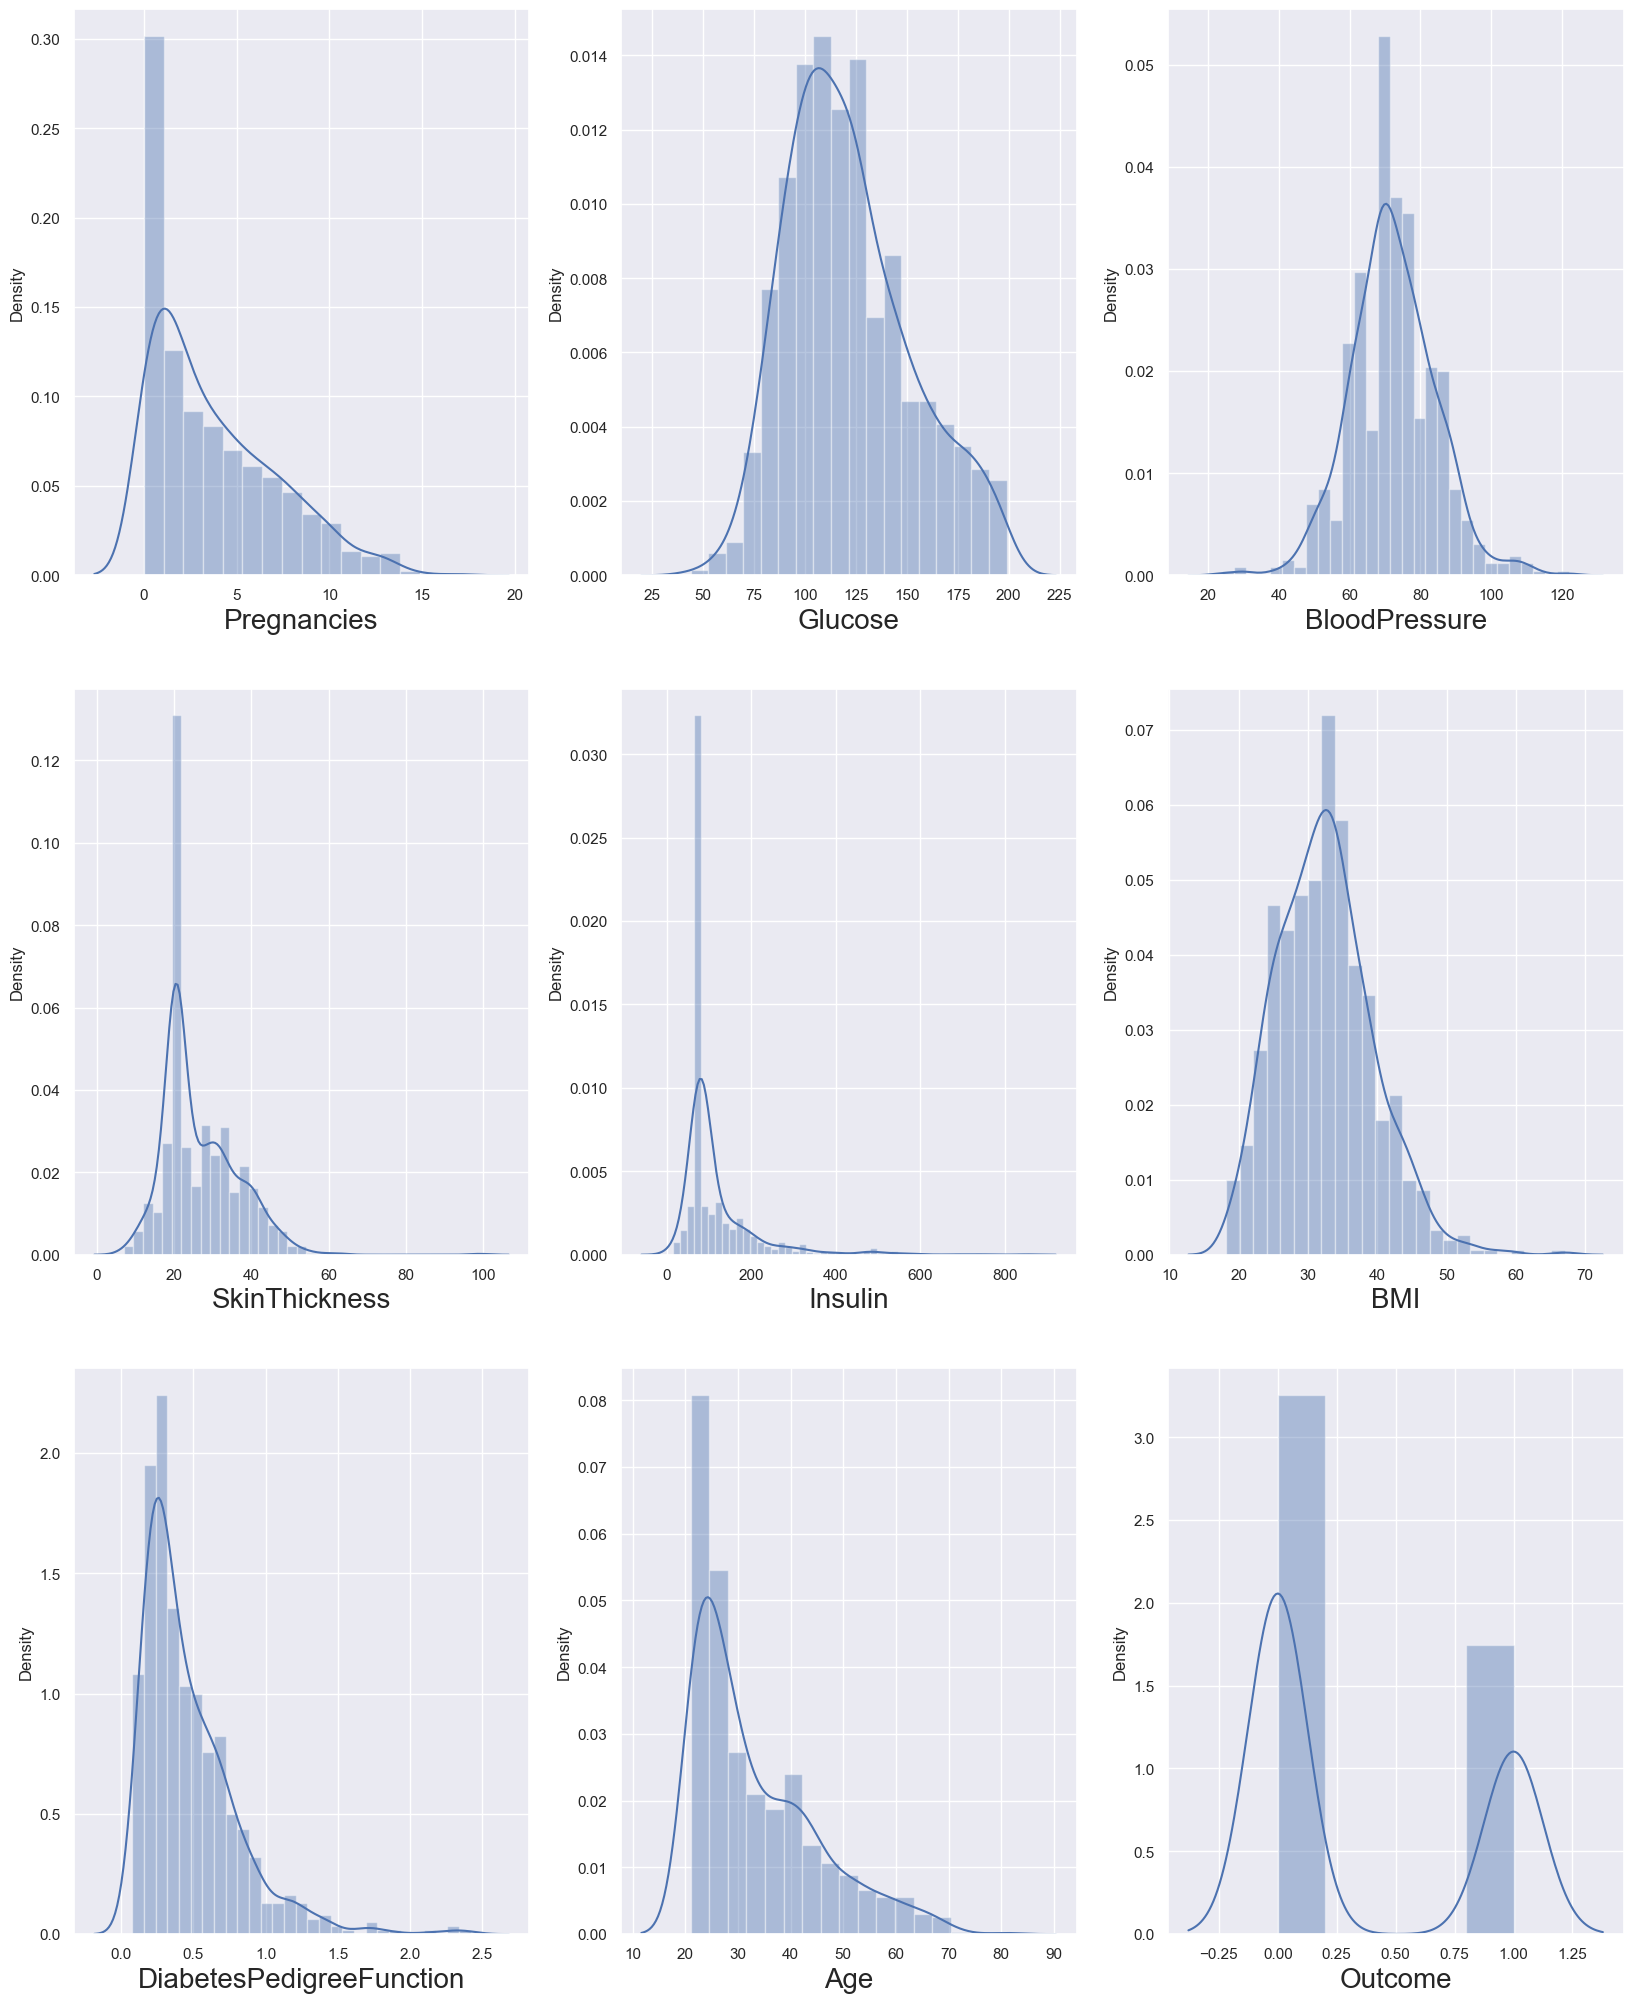

In [102]:
# visualizing the distrubtion of the data, to determine whether my data is normalized or not
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: #since i have 9 columns in my dataset
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

i have removed the zero's in the crutial columns where data cant be zero

<AxesSubplot:>

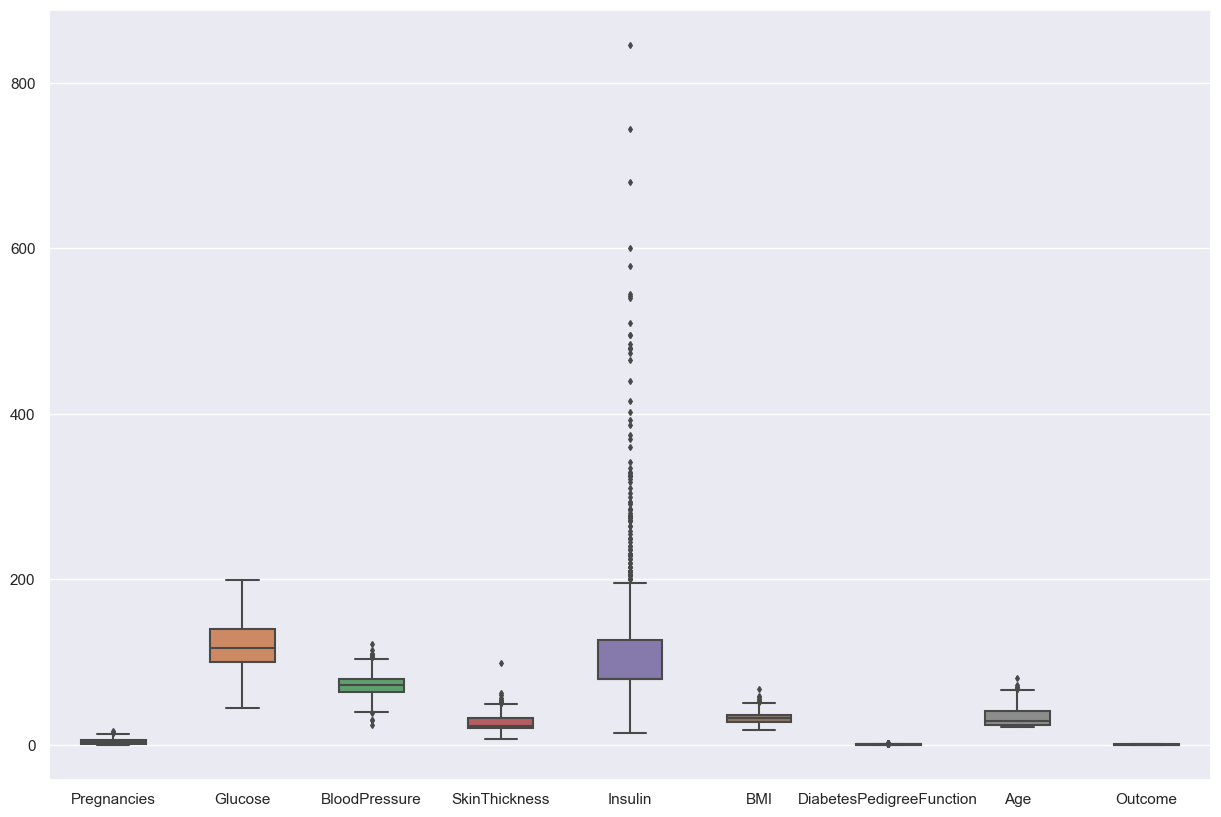

In [103]:
# checking whether my data contains outliers using boxplot
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [104]:
q = data['Pregnancies'].quantile(0.98)
# am removing the top 2% data from the pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data['BMI'].quantile(0.99)
# here am removing top 1% from the BMI column
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data['SkinThickness'].quantile(0.99)
# here am removing the top 1% from the SkinThickness column
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data['Insulin'].quantile(0.95)
# here am removing the top 5% from the insulin column
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data['DiabetesPedigreeFunction'].quantile(0.99)
# am removing the top 1% from DiabetesPedigreeFunction
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data['Age'].quantile(0.99)
# here am removing the top 1% from the age column
data_cleaned = data_cleaned[data_cleaned['Age']<q]

In [105]:
data.shape

(768, 9)

In [106]:
data_cleaned.shape

(680, 9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

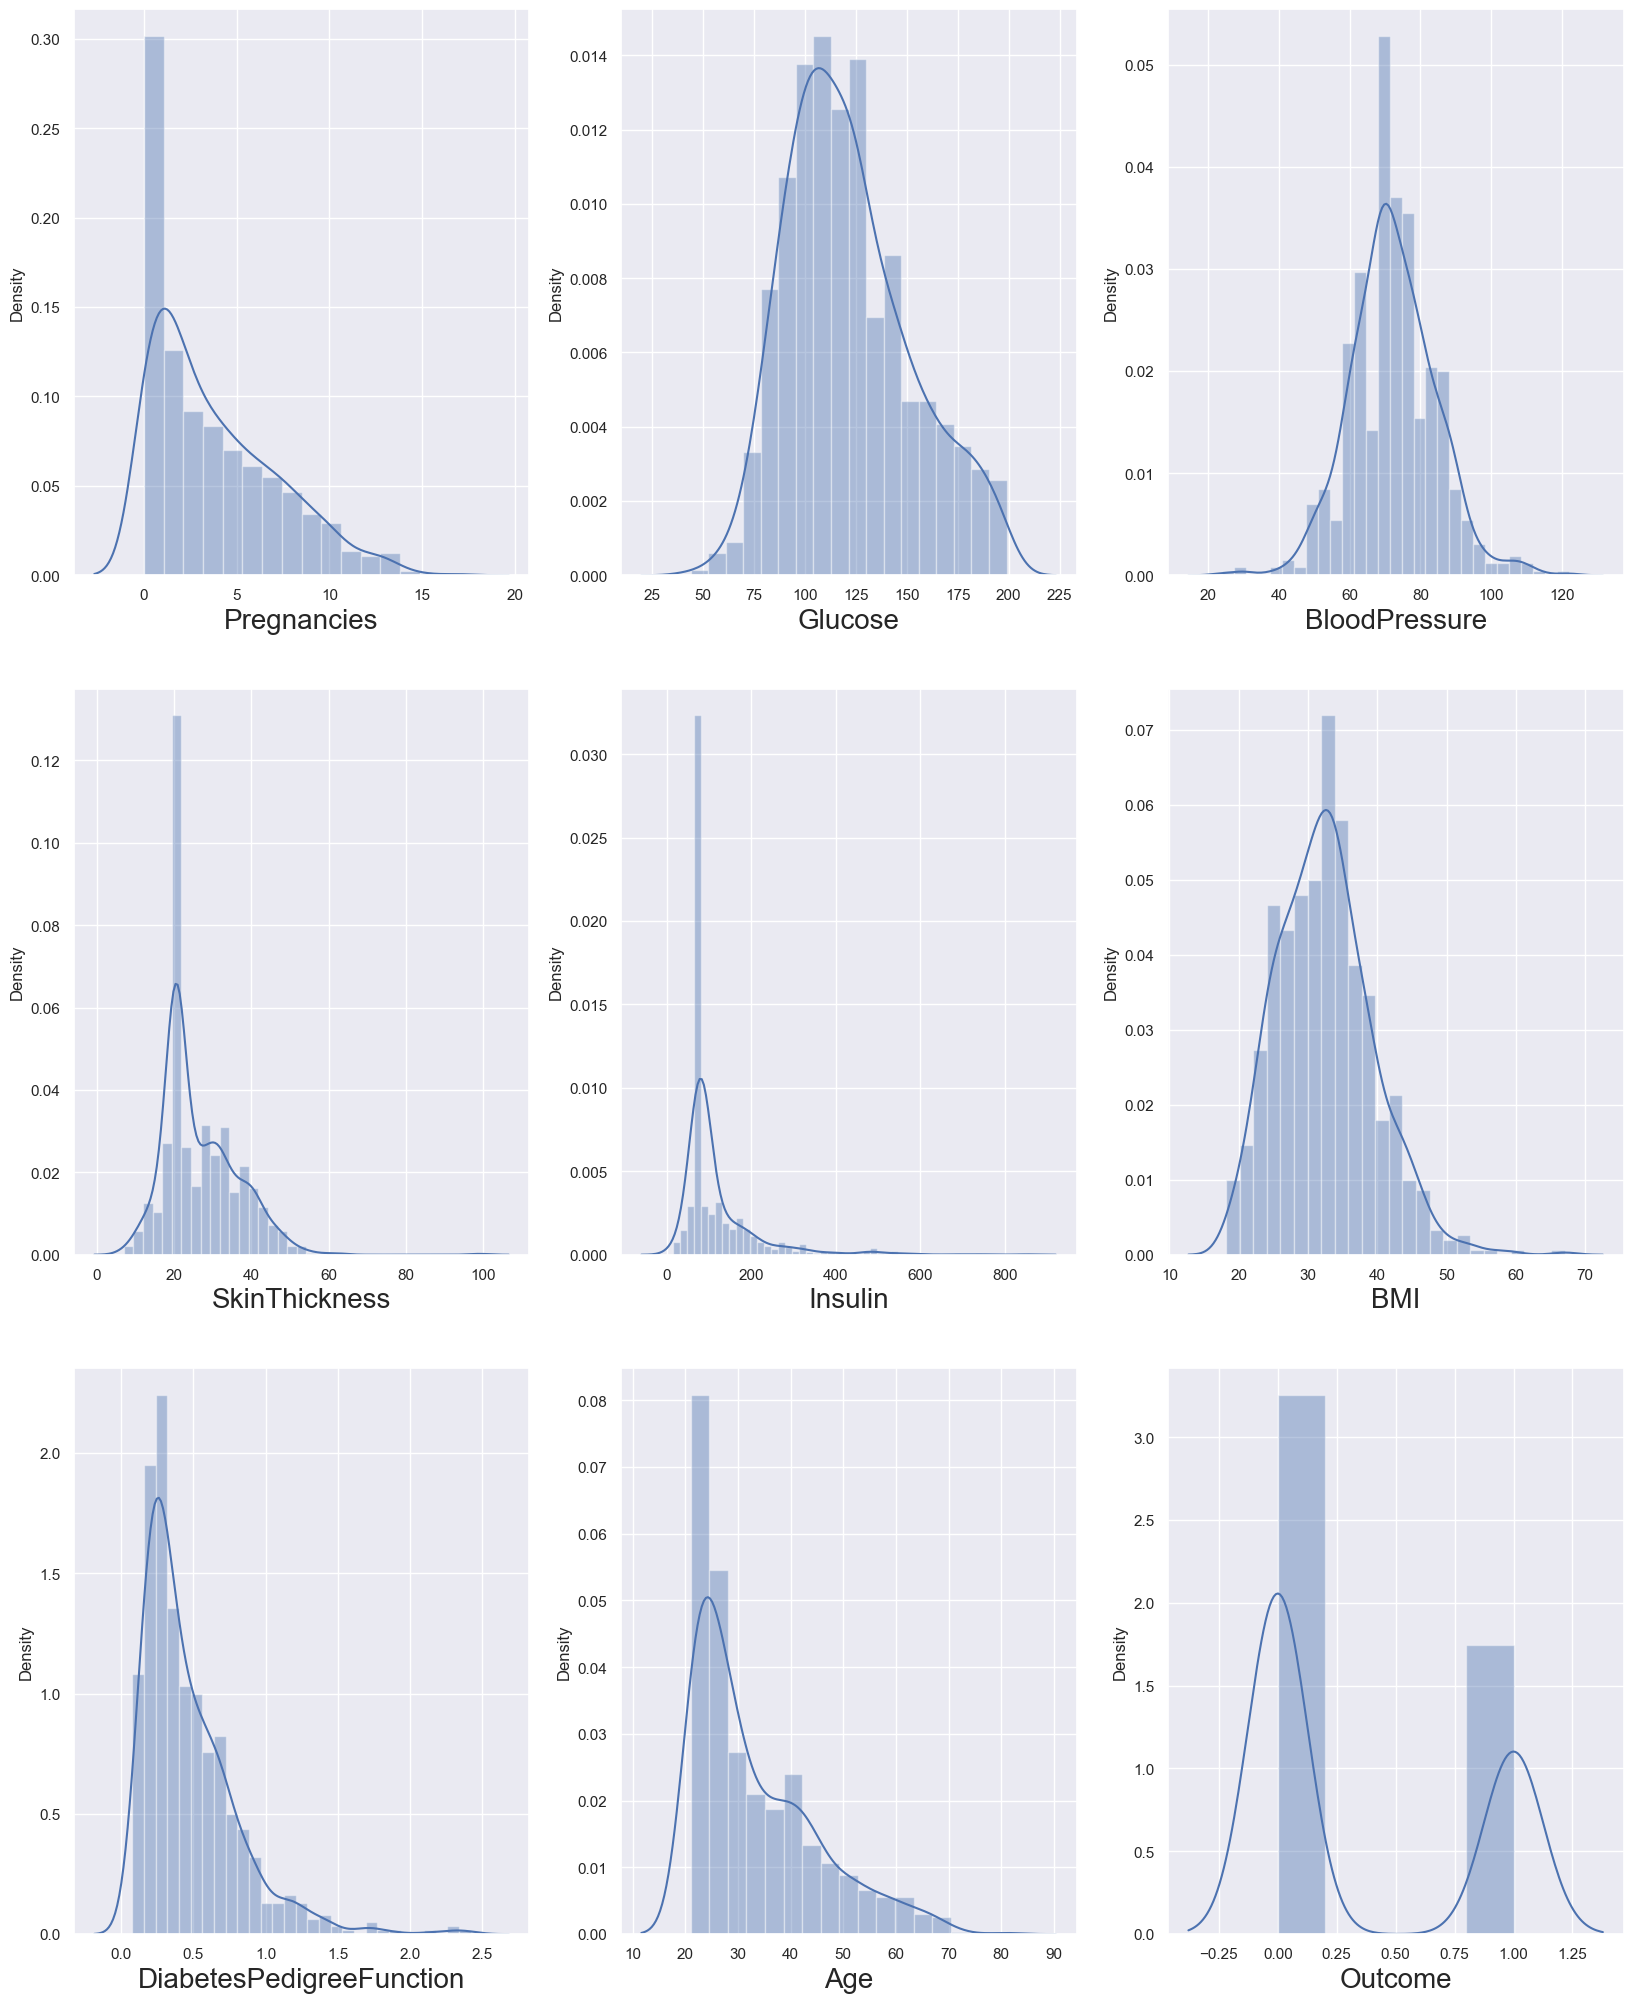

In [107]:
#how the data is distribured for every column after removing the outliers and the zero's in the crutial columns
# visualizing the distrubtion of the data, to determine whether my data is normalized or not
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: #since i have 9 columns in my dataset
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

In [108]:
# separating the input data and the label
X = data_cleaned.drop("Outcome", axis=1)
y = data_cleaned['Outcome']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

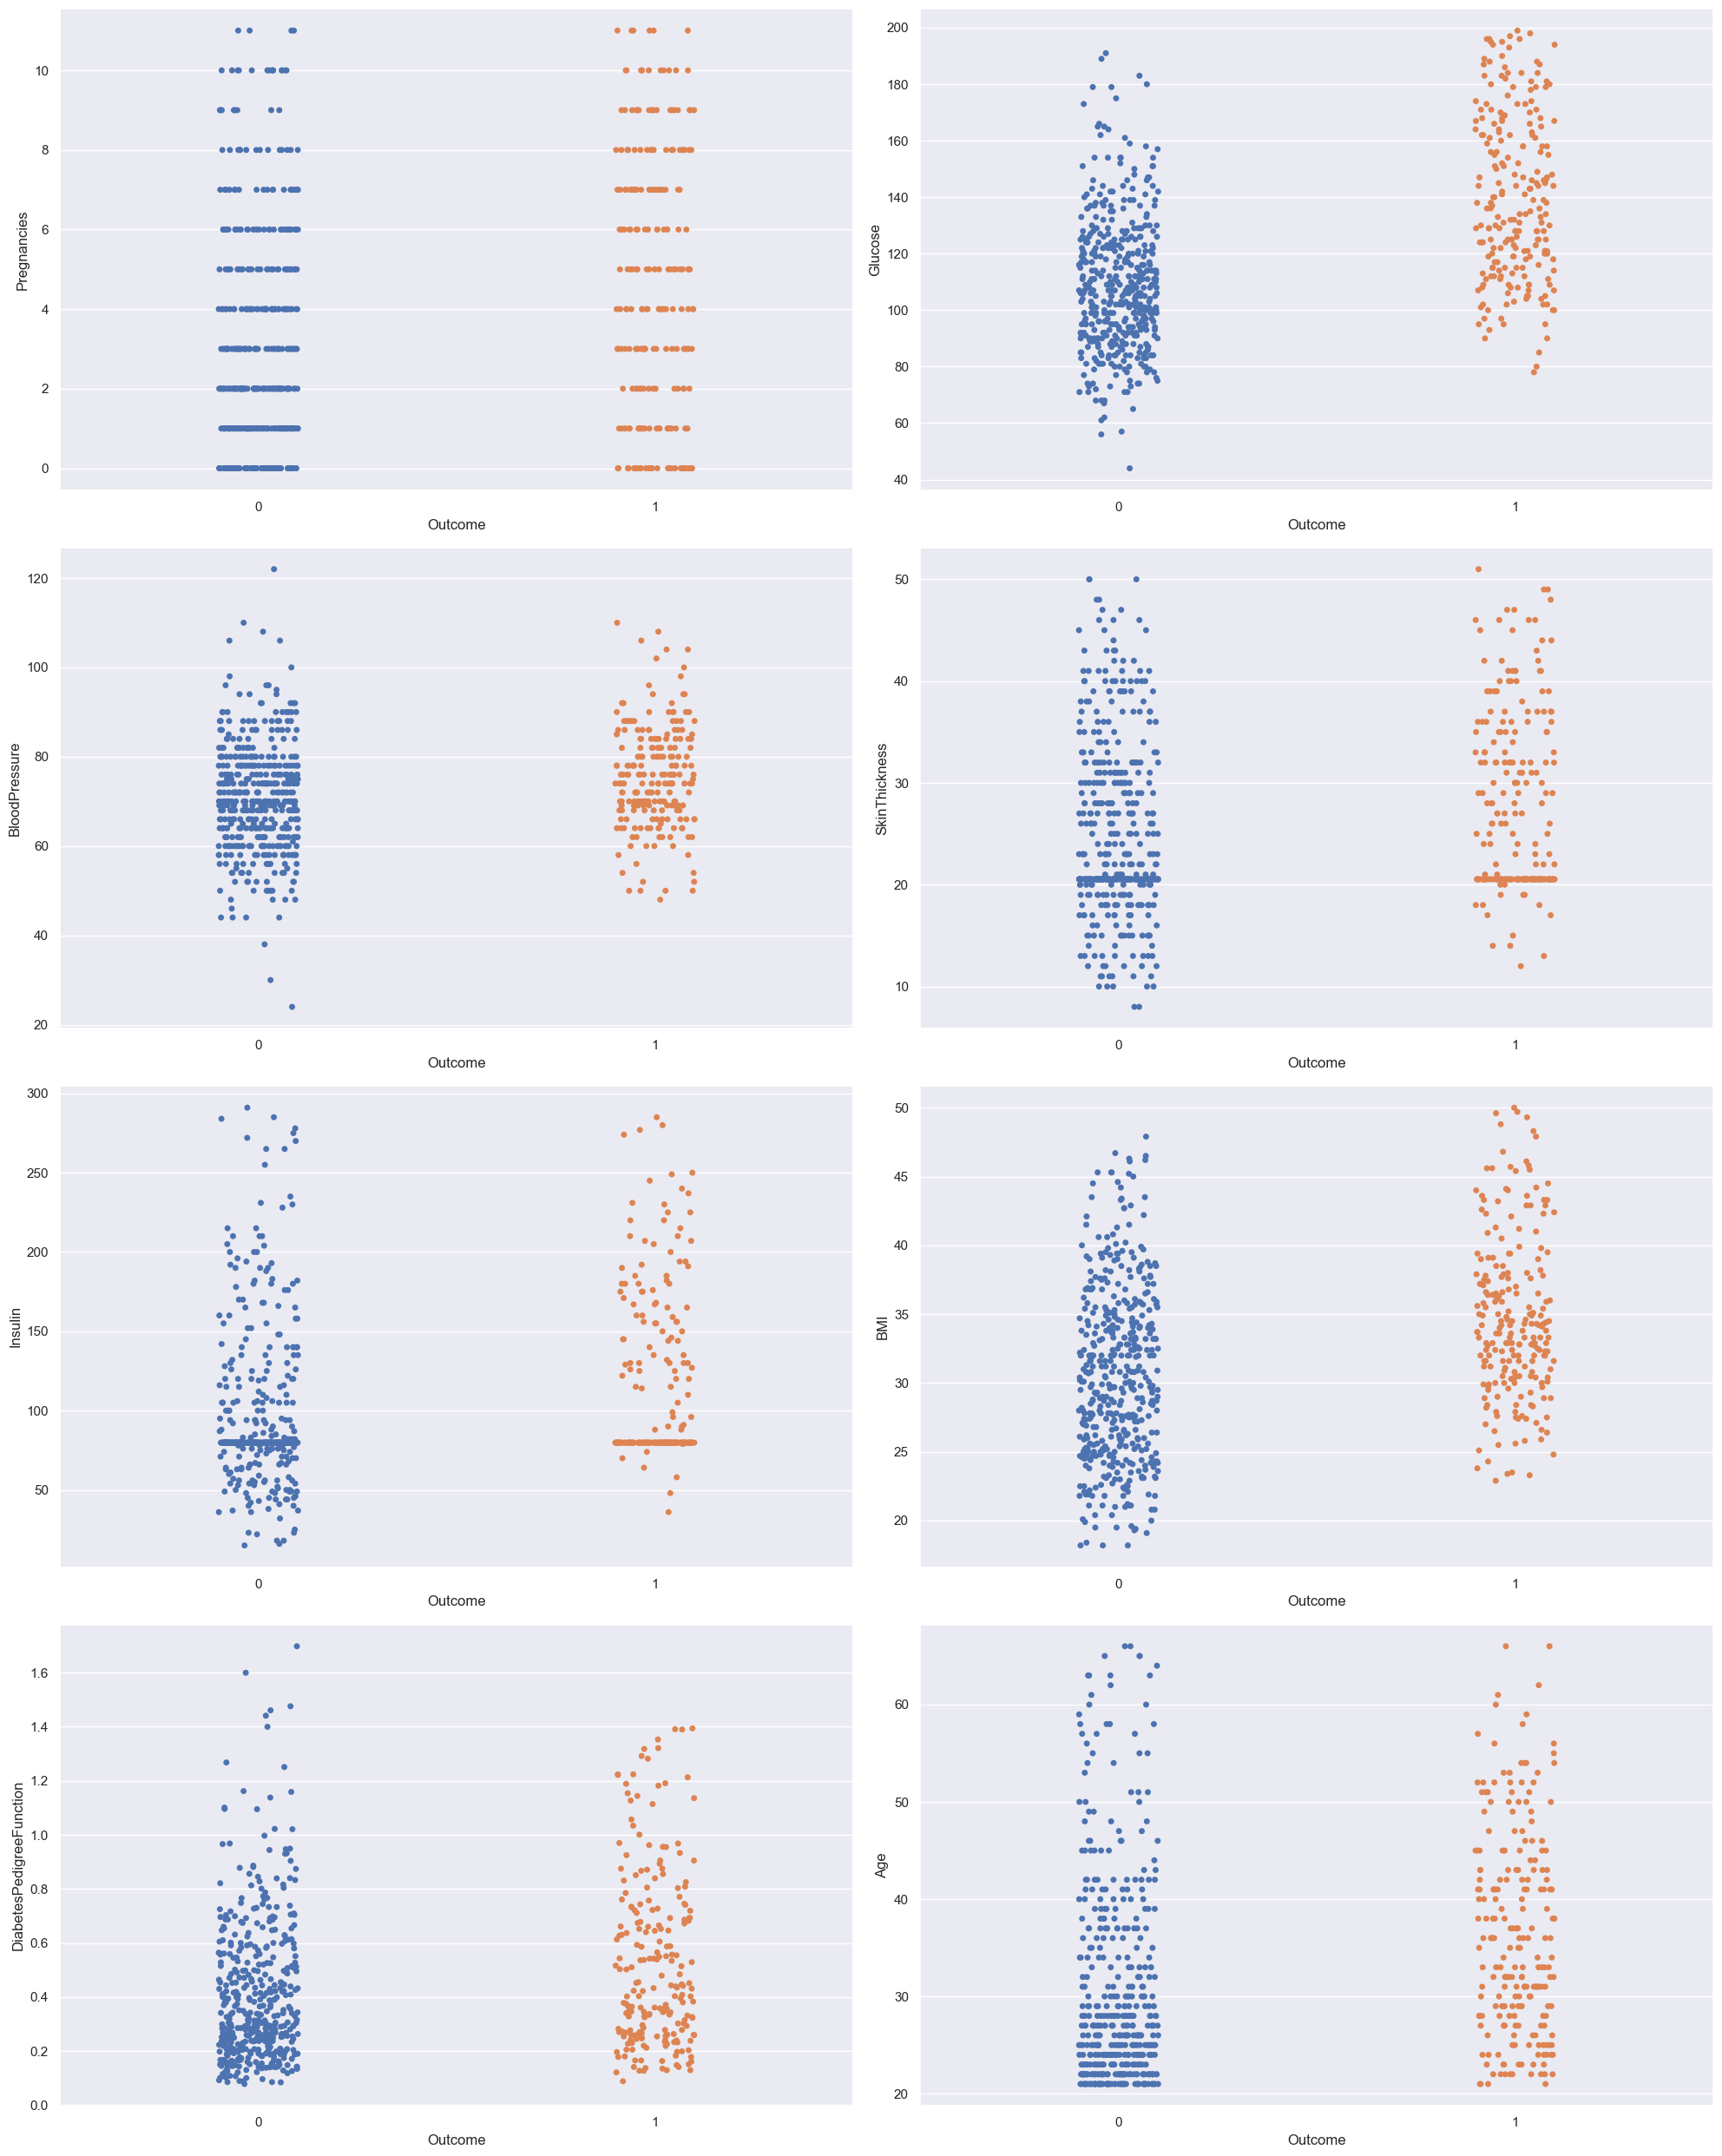

In [109]:
# lets see how data is distributed for every column
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data:
    if plotnumber <=8:
        ax = plt.subplot(4,2, plotnumber)
        sns.stripplot(y, X[column])
    plotnumber += 1
plt.tight_layout()

In [110]:
# lets now scale out data to minimize the huge variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
# checking for multicollinearity
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

In [112]:
vif

,vif,Features
0,1.452236,Pregnancies
1,1.306339,Glucose
2,1.263154,BloodPressure
3,1.484098,SkinThickness
4,1.282659,Insulin
5,1.525553,BMI
6,1.040328,DiabetesPedigreeFunction
7,1.666414,Age


our vif is good since they are below 5 which shows that the multicollinearity is not that severe

In [179]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [180]:
# importing naive bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [181]:
model.fit(x_train, y_train)

GaussianNB()

In [182]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [183]:
model.score(x_test, y_test)

0.7470588235294118

In [184]:
y_pred = model.predict(x_test)

In [185]:
accuracy_score(y_test, y_pred)

0.7470588235294118

In [186]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[100,  20],
       [ 23,  27]], dtype=int64)

In [187]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [188]:
print(true_positive)
print(false_positive)
print(false_negative)
print(true_negative)

100
20
23
27


In [189]:
# precision
precision = true_positive/(true_positive + false_positive)
precision

0.8333333333333334

In [190]:
# recall
recall = true_positive/(true_positive + false_negative)
recall

0.8130081300813008

In [191]:
# F1 Score
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.8230452674897119

In [192]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6866666666666668

So far we have been doing grid search to maximise the accuracy of our model. Here, we’ll follow a different approach. We’ll create two models, one with Logistic regression and other with Naïve Bayes and we’ll compare the AUC. The algorithm having a better AUC shall be considered for production deployment.

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

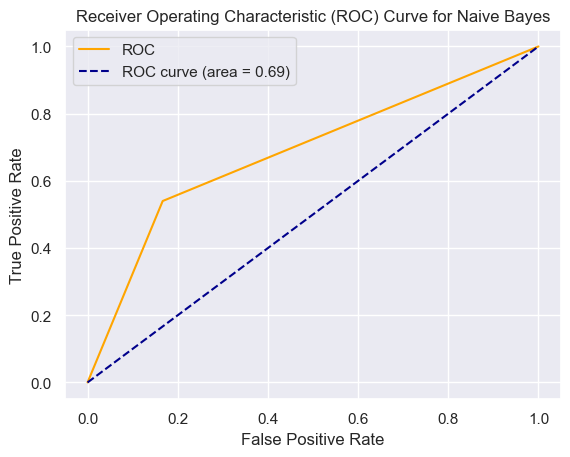

In [194]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [195]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [196]:
y_pred_logistic = log_reg.predict(x_test)

In [197]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7823529411764706

In [198]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[109,  11],
       [ 26,  24]], dtype=int64)

In [199]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)

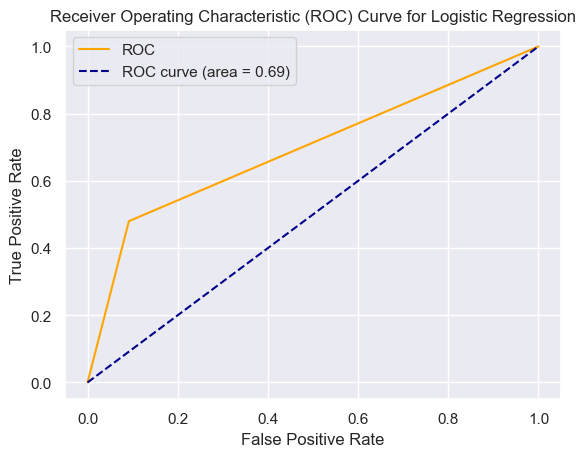

In [200]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [201]:
from sklearn.metrics  import roc_auc_score

In [202]:
auc_naive=roc_auc_score(y_test,y_pred)
auc_naive

0.6866666666666668

In [203]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

0.6941666666666667